 ### KNN (최 근접 이웃 알고리즘)
 - 학습과정은 주어진 데이터를 저장하는 것이 끝이다.
 - 예측시 새롭게 발생되는 데이터를 좌표상에 배치하고 주변의 데이터를 살펴봐서 결과를 예측한다.
 - 분류는 주변 데이터의 결과를 다수결로 선정한다.
 - 회귀는 주변 데이터의 결과의 평균을 구한다.
 - 모든 머신러닝 알고리즘 중 속도가 가장 빠르지만 성능이 떨어질 가능성이 있다.

In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### 데이터를 불러온다.

In [2]:
df1 = pd.read_csv('data/breast_cancer.csv')
df1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425,malignant
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952,benign
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091,malignant
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194,benign


### 데이터 전처리

In [3]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

In [4]:
# 문자열 -> 숫자
encoder1 = LabelEncoder()
encoder1.fit(y)
y = encoder1.transform(y)

In [5]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)

In [6]:
print(X)
print(y)

[[ 1.0716471  -2.11021126  1.24691885 ...  2.21627442  2.57629265
   1.89296305]
 [ 1.80872514 -0.29975355  1.665741   ...  1.02843583 -0.29491256
   0.27048275]
 [ 1.55731868  0.55280299  1.54548514 ...  1.88116631  1.04374227
   0.19229093]
 ...
 [ 1.52874976  1.47150615  1.4501098  ...  0.43900458 -1.00379467
  -1.25588676]
 [-0.63963097  2.26281581 -0.66183197 ... -0.68959168 -0.76491536
  -0.11396037]
 [ 0.0831626  -1.22825622  0.04684827 ... -0.15491471 -0.51828023
  -0.32247189]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1

### 기본 모델을 통한 교차 검증

In [7]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [8]:
model1 = KNeighborsClassifier()
r1 = cross_val_score(model1, X, y, scoring='f1', cv=kfold)
print(f'평균 성능 수치 : {r1.mean()}')

평균 성능 수치 : 0.9520902452922915


### 하이퍼 파라미터 튜닝

In [9]:
# n_neighbors : 이웃의 개수
params = {
    'n_neighbors' : list(range(1, 21))
}

tmp_model1 = KNeighborsClassifier()
grid1 = GridSearchCV(tmp_model1, param_grid=params, scoring='f1', cv=kfold)
grid1.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid1.best_params_}')
print(f'최적의 모델 평균 성능 : {grid1.best_score_}')

최적의 하이퍼 파라미터 : {'n_neighbors': 9}
최적의 모델 평균 성능 : 0.9591007420419185


In [10]:
print(f'KNN Basic : {r1.mean()}')
print(f'KNN Tuning : {grid1.best_score_}')

KNN Basic : 0.9520902452922915
KNN Tuning : 0.9591007420419185


### 최종 평가를 수행한다.

In [11]:
best_model1 = grid1.best_estimator_

In [12]:
# 학습용과 검증용으로 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
# 학습용 데이터로 학습을 시킨다.
best_model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [14]:
# 학습용 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X_train)

In [15]:
r1 = accuracy_score(y_train, y_pred1)
r2 = precision_score(y_train, y_pred1)
r3 = recall_score(y_train, y_pred1)
r4 = f1_score(y_train, y_pred1)
r5 = roc_auc_score(y_train, y_pred1)

print('KNN 학습 데이터 평가')
print(f'accuracy : {r1.mean()}')
print(f'precision : {r2.mean()}')
print(f'recall : {r3.mean()}')
print(f'f1 : {r4.mean()}')
print(f'roc_auc : {r5.mean()}')

KNN 학습 데이터 평가
accuracy : 0.9705882352941176
precision : 0.9926470588235294
recall : 0.9375
f1 : 0.9642857142857143
roc_auc : 0.9661989795918368


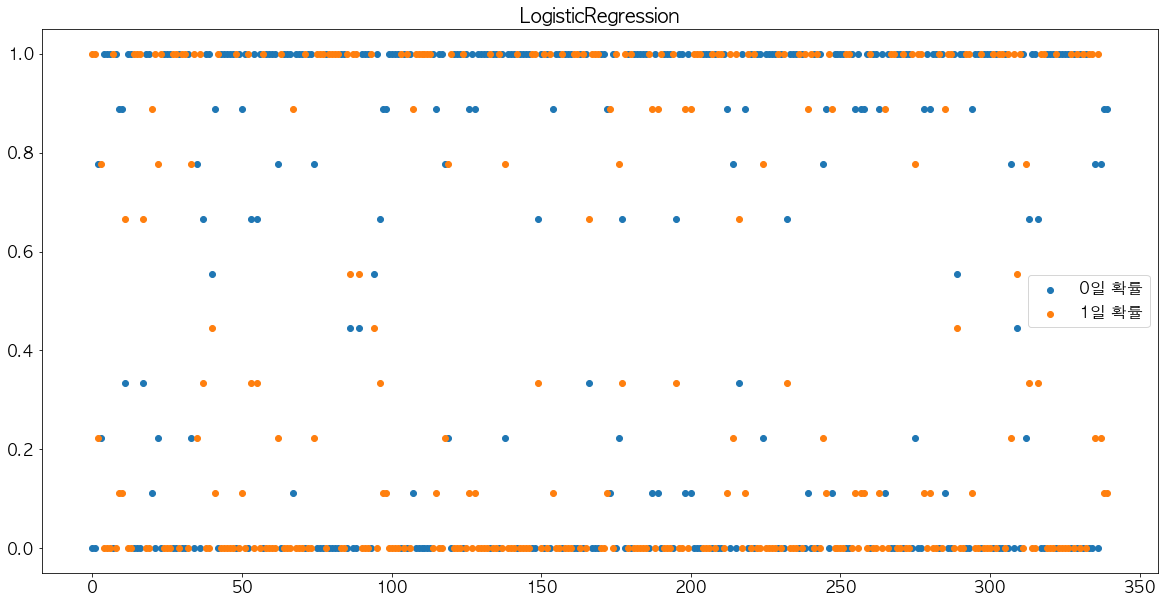

In [16]:
proba1 = best_model1.predict_proba(X_train)

# 0일 확률
a10 = proba1[:, 0]
# 1일 확률
a11 = proba1[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.title('LogisticRegression')
plt.legend()
plt.show()

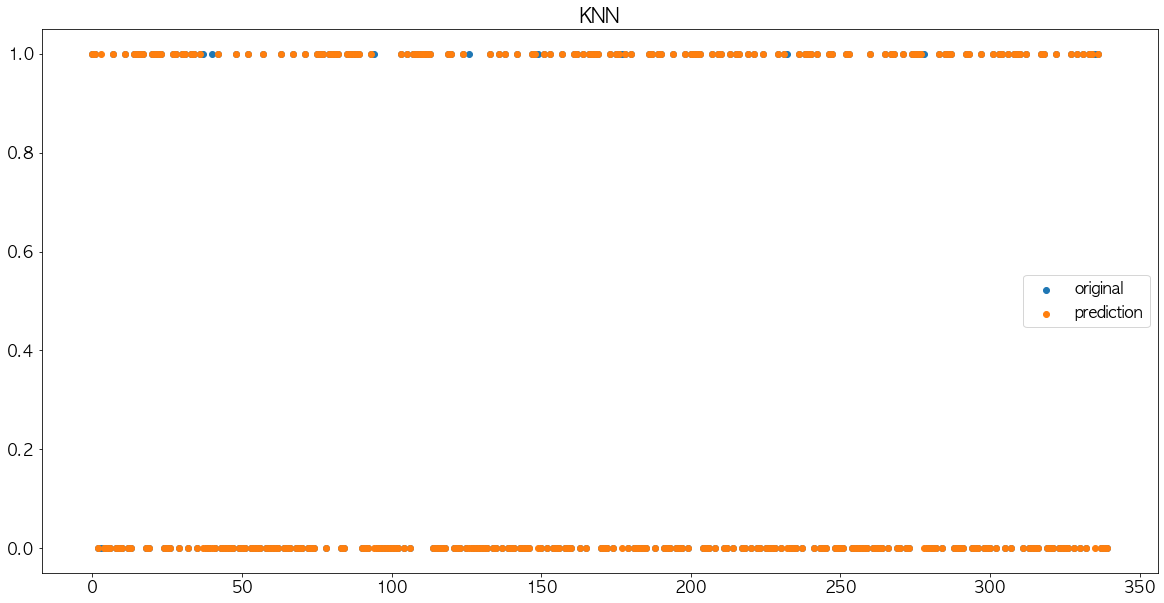

In [17]:
# 예측 결과와 진짜 결과의 패턴을 시각화
plt.scatter(list(range(len(y_train))), y_train, label='original')
plt.scatter(list(range(len(y_pred1))), y_pred1, label='prediction')
plt.title('KNN')
plt.legend()
plt.show()

In [18]:
# 검증용 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X_test)

In [19]:
r1 = accuracy_score(y_test, y_pred1)
r2 = precision_score(y_test, y_pred1)
r3 = recall_score(y_test, y_pred1)
r4 = f1_score(y_test, y_pred1)
r5 = roc_auc_score(y_test, y_pred1)

print('KNN 검증 데이터 평가')
print(f'accuracy : {r1.mean()}')
print(f'precision : {r2.mean()}')
print(f'recall : {r3.mean()}')
print(f'f1 : {r4.mean()}')
print(f'roc_auc : {r5.mean()}')

KNN 검증 데이터 평가
accuracy : 0.9736842105263158
precision : 0.9534883720930233
recall : 0.9761904761904762
f1 : 0.9647058823529412
roc_auc : 0.9742063492063492


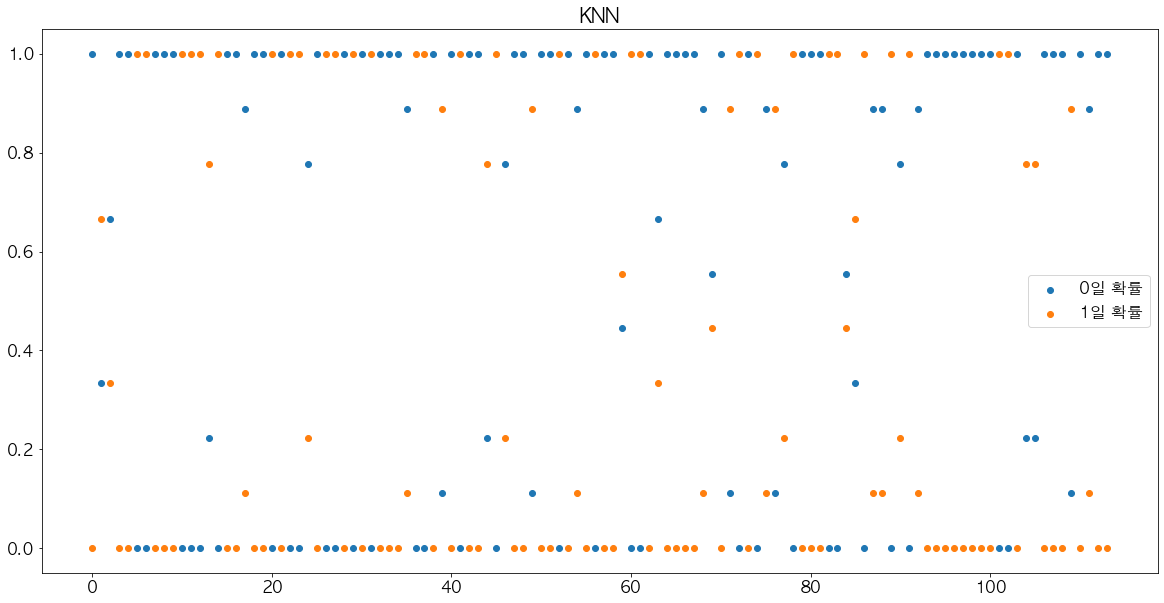

In [20]:
proba1 = best_model1.predict_proba(X_test)

# 0일 확률
a10 = proba1[:, 0]
# 1일 확률
a11 = proba1[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.title('KNN')
plt.legend()
plt.show()

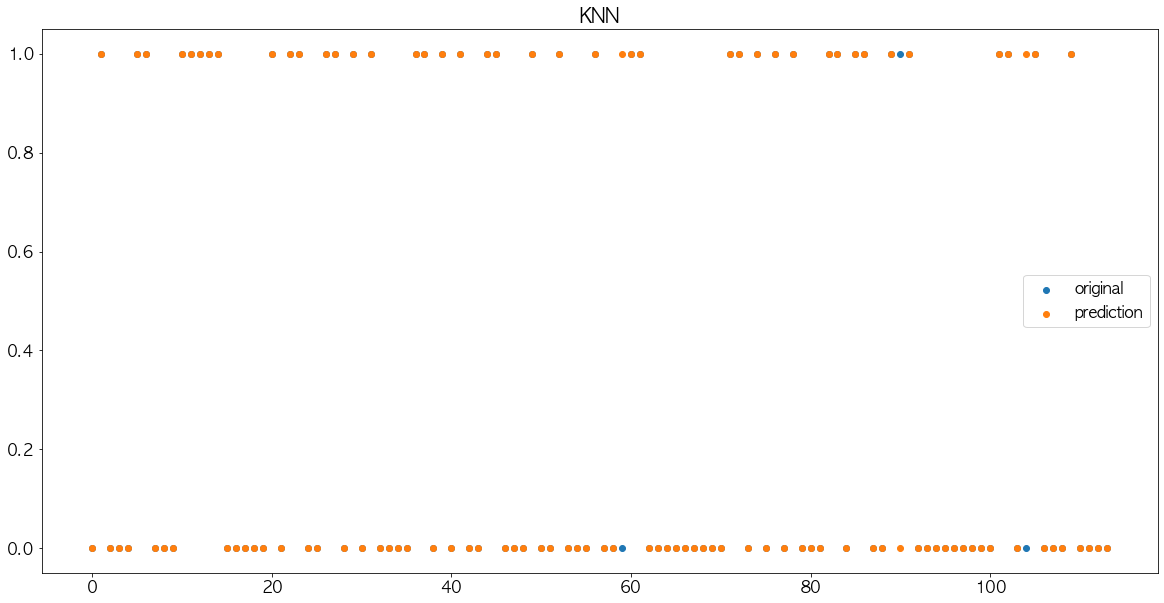

In [21]:
# 예측 결과와 진짜 결과의 패턴을 시각화
plt.scatter(list(range(len(y_test))), y_test, label='original')
plt.scatter(list(range(len(y_pred1))), y_pred1, label='prediction')
plt.title('KNN')
plt.legend()
plt.show()

### 전체 데이터를 학습시킨다.

In [22]:
best_model1.fit(X, y)

KNeighborsClassifier(n_neighbors=9)

### 새로 발생된 데이터를 예측한다.

In [23]:
df2 = pd.read_csv('data/breast_cancer_new.csv')
df2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.340,22.15,91.62,633.5,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.050,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,13.120,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.340,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
111,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
112,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
113,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400


In [24]:
# 표준화
X = scaler1.transform(df2)
X

array([[-0.46250369, -0.45164581, -0.50218195, ..., -0.28043066,
         0.5116929 , -0.5831113 ],
       [-0.24537993,  2.87283471, -0.26498762, ..., -0.59279929,
        -1.15425761, -0.39577673],
       [-0.74533596,  2.52250257, -0.7406203 , ..., -0.7316298 ,
        -0.08705654, -0.64284116],
       ...,
       [ 0.67453917,  2.22606768,  0.64563954, ...,  0.3671957 ,
        -1.12013199, -0.31704191],
       [ 1.81729582,  2.53230207,  1.96430728, ...,  2.21029035,
         1.77899418,  2.16989242],
       [-1.85095302,  1.3588119 , -1.85817047, ..., -1.75415837,
        -0.10722167, -0.74112394]])

In [25]:
# 예측한다.
y_pred1 = best_model1.predict(X)
y_pred1

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0])

In [26]:
# 문자열로 변환한다.
target = encoder1.inverse_transform(y_pred1)
target

array(['benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'malignant', 'benign', 'malignant', 'malignant', 'benign',
       'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignant', 'm

In [27]:
# 저장한다.
df2['target'] = target
df2.to_csv('data/breast_cancer_KNN.csv')